In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

sns.set_theme()
sns.set_context("paper")

In [2]:
# Extraction function
def tensorboard_logs_to_pandas_dataframe(experiment_log_path, ignored_runs=[]):
    """
    This functions assumes that the runs were consecutive continuations. That is,
    version_0 ran for 90 epochs then version_1 from 91 to 180 and so on.
    
    experiment_log_path: Path to the folder containing various runs.
    ignored_runs: Ignored versions.
    """
    pandas_df = pd.DataFrame({"metric": [], "value": [], "step": [], "version_tag": []})
    
    # find out how many run / folders are there
    experiment_runs_folder = {f.name : f.path for f in os.scandir(experiment_log_path) if f.is_dir()}
    
    for experiment_tag, experiment_folder in experiment_runs_folder.items():
        
        if experiment_tag in ignored_runs:
            continue
        
        try:
            event_acc = EventAccumulator(experiment_folder)
            event_acc.Reload()
            tags = event_acc.Tags()["scalars"]
            
            for tag in tags:
                event_list = event_acc.Scalars(tag)
                values = list(map(lambda x: x.value, event_list))
                step = list(map(lambda x: x.step, event_list))
                r = {
                        "metric": [tag] * len(step), 
                        "value": values, 
                        "step": step, 
                        "version_tag": experiment_tag
                }
                r = pd.DataFrame(r)
                pandas_df = pd.concat([pandas_df, r], ignore_index=True)
        
        except Exception:
            print("Event file possibly corrupt: {}".format(experiment_folder))
            
    return pandas_df


In [21]:
tf_metrics_in_path = r"D:\Saarbrucken\EDA_Research\vae-disentanglement\notebooks\dsprites_latentnn_w_kld1\dsprites_latentnn_w_kld1"
csv_metrics_out_path = "./dsprites_metrics_wkld1.csv"

metrics_df_wkld1 = tensorboard_logs_to_pandas_dataframe(tf_metrics_in_path, ignored_runs=["version_0", "version_1"])
metrics_df_wkld1.to_csv(csv_metrics_out_path)

In [41]:
def plot_kld_loss_trends(tensorboard_df, save_path):
    
    kld_loss_trends = tensorboard_df[tensorboard_df["metric"].str.contains("KLD_Per_Node")].reindex()

    kld_trends_plot = sns.lineplot(x="step", y="value", hue="metric", data=kld_loss_trends)

    plt.xlabel('Train epochs')
    plt.ylabel('Average KLD Loss')
    plt.title(r'KLD Loss trends for $\beta = 1$ on $\mathit{DSprites}$ dataset')
    plt.legend(loc="lower center", ncol=5)
    
    # update legend title
    kld_trends_plot.legend_.set_title('Latent nodes')
    # Update the legends
    node_labels = [f'$z_{i}$' for i in range(5)]
    for old_legend, new_legend in zip(kld_trends_plot.legend_.texts, node_labels):
        old_legend.set_text(new_legend)
    
    plot_axes = kld_trends_plot.axes
    plot_axes.set(ylim=(0,5))
    
    # save as pdf for inclusion
    kld_trends_plot.get_figure().savefig(save_path)
    
    return kld_trends_plot

<AxesSubplot:title={'center':'KLD Loss trends for $\\beta = 1$ on $\\mathit{DSprites}$ dataset'}, xlabel='Train epochs', ylabel='Average KLD Loss'>

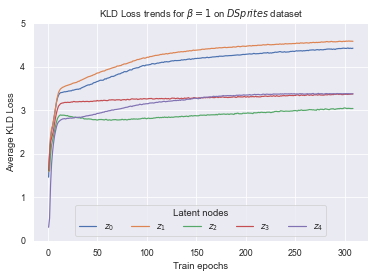

In [43]:
save_path = "kld_trends_wkld1.pdf"
plot_kld_loss_trends(metrics_df_wkld1, save_path)

In [32]:
tf_metrics_in_path = r"D:\Saarbrucken\EDA_Research\vae-disentanglement\notebooks\dsprites_latentnn_w_kld5\dsprites_latentnn_w_kld5"
csv_metrics_out_path = "./dsprites_metrics_wkld5.csv"

metrics_df_wkld5 = tensorboard_logs_to_pandas_dataframe(tf_metrics_in_path)
metrics_df_wkld5.to_csv(csv_metrics_out_path)

<AxesSubplot:title={'center':'KLD Loss trends for $\\beta = 5$ on $\\mathit{DSprites}$ dataset'}, xlabel='Train epochs', ylabel='Average KLD Loss'>

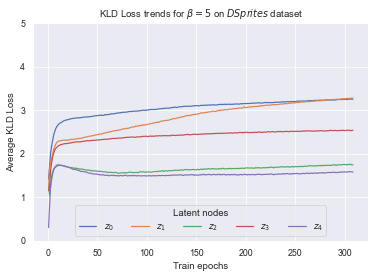

In [40]:
save_path = "kld_trends_wkld5.pdf"
plot_kld_loss_trends(metrics_df_wkld5, save_path)

In [65]:
metrics_df_wkld5["metric"].unique()

array(['Loss/Total Loss (Train)', 'Loss/Reconstruction Loss (Train)',
       'Loss/Total KLD Loss (Train)', 'Node_1/Mu_q_comp_0',
       'Node_2/Mu_q_comp_0', 'Node_3/Mu_q_comp_0', 'Node_4/Mu_q_comp_0',
       'Node_5/Mu_q_comp_0', 'Node_1/Mu_p_comp_0', 'Node_2/Mu_p_comp_0',
       'Node_3/Mu_p_comp_0', 'Node_4/Mu_p_comp_0', 'Node_5/Mu_p_comp_0',
       'Node_1/Std_q_comp_0', 'Node_2/Std_q_comp_0',
       'Node_3/Std_q_comp_0', 'Node_4/Std_q_comp_0',
       'Node_5/Std_q_comp_0', 'Node_1/Std_p_comp_0',
       'Node_2/Std_p_comp_0', 'Node_3/Std_p_comp_0',
       'Node_4/Std_p_comp_0', 'Node_5/Std_p_comp_0',
       'LossTermWeights/w_recon', 'LossTermWeights/w_kld',
       'LossTermWeights/w_sup_reg', 'LossTermWeights/w_cov_loss',
       'KLD_Per_Node/KLD_z_0', 'KLD_Per_Node/KLD_z_1',
       'KLD_Per_Node/KLD_z_2', 'KLD_Per_Node/KLD_z_3',
       'KLD_Per_Node/KLD_z_4'], dtype=object)

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/47728396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_loss_trend_wkld5_df['kld_value'] = [5] * len(total_loss_trend_wkld5_df)
C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/47728396.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_loss_trend_wkld1_df['kld_value'] = [1] * len(total_loss_trend_wkld1_df)


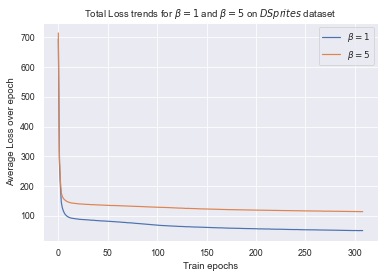

In [68]:
total_loss_trend_wkld5_df = metrics_df_wkld5[ metrics_df_wkld5["metric"] == "Loss/Total Loss (Train)" ]
total_loss_trend_wkld1_df = metrics_df_wkld1[ metrics_df_wkld1["metric"] == "Loss/Total Loss (Train)" ]

# added these cols so that we can use them in hue later
total_loss_trend_wkld5_df['kld_value'] = [5] * len(total_loss_trend_wkld5_df)
total_loss_trend_wkld1_df['kld_value'] = [1] * len(total_loss_trend_wkld1_df)

total_loss_df = pd.concat([total_loss_trend_wkld1_df, total_loss_trend_wkld5_df], ignore_index=True)

loss_plot = sns.lineplot(x="step", y="value", hue="kld_value", palette=["C0", "C1"], data=total_loss_df)

plt.xlabel('Train epochs')
plt.ylabel('Average Loss over epoch')
plt.title(r'Total Loss trends for $\beta = 1$ and $\beta = 5$ on $\mathit{DSprites}$ dataset')
#plt.legend(loc="lower center", ncol=5)
    
# update legend title
loss_plot.legend_.set_title(None)
# Update the legends
node_labels = [r'$\beta = 1$', r'$\beta = 5$']
for old_legend, new_legend in zip(loss_plot.legend_.texts, node_labels):
    old_legend.set_text(new_legend)

loss_plot.get_figure().savefig("total_loss_trends_plot.pdf")

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/3681010861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_kld_loss_trend_wkld5_df['kld_value'] = [5] * len(total_kld_loss_trend_wkld5_df)
C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/3681010861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_kld_loss_trend_wkld1_df['kld_value'] = [1] * len(total_kld_loss_trend_wkld1_df)


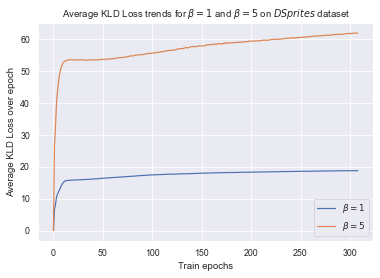

In [69]:
total_kld_loss_trend_wkld5_df = metrics_df_wkld5[ metrics_df_wkld5["metric"] == "Loss/Total KLD Loss (Train)" ]
total_kld_loss_trend_wkld1_df = metrics_df_wkld1[ metrics_df_wkld1["metric"] == "Loss/Total KLD Loss (Train)" ]

# added these cols so that we can use them in hue later
total_kld_loss_trend_wkld5_df['kld_value'] = [5] * len(total_kld_loss_trend_wkld5_df)
total_kld_loss_trend_wkld1_df['kld_value'] = [1] * len(total_kld_loss_trend_wkld1_df)

total_kld_loss_df = pd.concat([total_kld_loss_trend_wkld1_df, total_kld_loss_trend_wkld5_df], ignore_index=True)

loss_plot = sns.lineplot(x="step", y="value", hue="kld_value", palette=["C0", "C1"], data=total_kld_loss_df)

plt.xlabel('Train epochs')
plt.ylabel('Average KLD Loss over epoch')
plt.title(r'Average KLD Loss trends for $\beta = 1$ and $\beta = 5$ on $\mathit{DSprites}$ dataset')
#plt.legend(loc="lower center", ncol=5)
    
# update legend title
loss_plot.legend_.set_title(None)
# Update the legends
node_labels = [r'$\beta = 1$', r'$\beta = 5$']
for old_legend, new_legend in zip(loss_plot.legend_.texts, node_labels):
    old_legend.set_text(new_legend)
    
loss_plot.get_figure().savefig("total_kld_loss_trends_plot.pdf")

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/1163420091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_recon_loss_trend_wkld5_df['kld_value'] = [5] * len(total_recon_loss_trend_wkld5_df)
C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/1163420091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_recon_loss_trend_wkld1_df['kld_value'] = [1] * len(total_recon_loss_trend_wkld1_df)


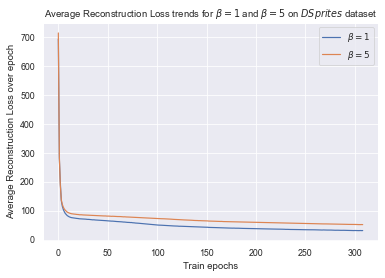

In [70]:
total_recon_loss_trend_wkld5_df = metrics_df_wkld5[ metrics_df_wkld5["metric"] == "Loss/Reconstruction Loss (Train)" ]
total_recon_loss_trend_wkld1_df = metrics_df_wkld1[ metrics_df_wkld1["metric"] == "Loss/Reconstruction Loss (Train)" ]

# added these cols so that we can use them in hue later
total_recon_loss_trend_wkld5_df['kld_value'] = [5] * len(total_recon_loss_trend_wkld5_df)
total_recon_loss_trend_wkld1_df['kld_value'] = [1] * len(total_recon_loss_trend_wkld1_df)

total_recon_loss_df = pd.concat([total_recon_loss_trend_wkld1_df, total_recon_loss_trend_wkld5_df], ignore_index=True)

loss_plot = sns.lineplot(x="step", y="value", hue="kld_value", palette=["C0", "C1"], data=total_recon_loss_df)

plt.xlabel('Train epochs')
plt.ylabel('Average Reconstruction Loss over epoch')
plt.title(r'Average Reconstruction Loss trends for $\beta = 1$ and $\beta = 5$ on $\mathit{DSprites}$ dataset')
#plt.legend(loc="lower center", ncol=5)
    
# update legend title
loss_plot.legend_.set_title(None)
# Update the legends
node_labels = [r'$\beta = 1$', r'$\beta = 5$']
for old_legend, new_legend in zip(loss_plot.legend_.texts, node_labels):
    old_legend.set_text(new_legend)
    
loss_plot.get_figure().savefig("total_recon_loss_trends_plot.pdf")